In [1]:
from RAG import RAG
import numpy as np
import matplotlib.pyplot as plt

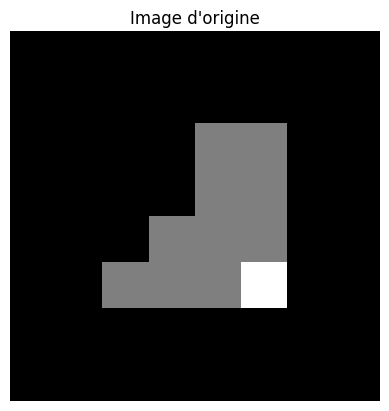

In [2]:
img = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 127, 127, 0, 0],
    [0, 0, 0, 0, 127, 127, 0, 0],
    [0, 0, 0, 127, 127, 127, 0, 0],
    [0, 0, 127, 127, 127, 255, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
    ], dtype=int)

plt.title("Image d'origine")
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

# Partie I : Division

In [ ]:
# Instanciation du RAG
graphe = RAG(img)
# Construction de l'arbre
graphe.quad_tree()
graphe.print_quad_tree()
print("Le nombre de noeuds dans l'arbre :")
print(graphe.get_tree_size())

L'arbre de la division de l'image :
     ┌─ 1
     │     ┌─ 5
     ├─ 2 ─┼─ 6
     │     ├─ 7
     │     └─ 8
     │     ┌─ 9
     │     │      ┌─ 17
─ 0 ─┤     ├─ 10 ─┼─ 18
     ├─ 3 ─┤      ├─ 19
     │     │      └─ 20
     │     ├─ 11
     │     └─ 12
     │            ┌─ 21
     │     ┌─ 13 ─┼─ 22
     │     │      ├─ 23
     └─ 4 ─┤      └─ 24
           ├─ 14
           ├─ 15
           └─ 16
Le nombre de noeuds dans l'arbre :
25


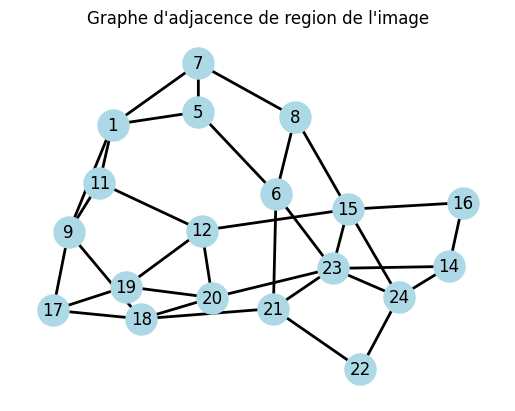

Le dictionnaire d'adjacence du RAG :
  1 : [9, 5, 11, 7]
  5 : [7, 6, 1]
  6 : [21, 8, 23, 5]
  7 : [5, 1, 8]
  8 : [15, 6, 7]
  9 : [17, 11, 1, 18]
 11 : [9, 1, 12]
 12 : [19, 15, 20, 11]
 14 : [16, 24, 23]
 15 : [24, 8, 23, 12, 16]
 16 : [14, 15]
 17 : [9, 18, 19]
 18 : [20, 17, 9, 21]
 19 : [12, 20, 17]
 20 : [18, 23, 19, 12]
 21 : [6, 22, 18, 23]
 22 : [21, 24]
 23 : [20, 15, 6, 24, 21, 14]
 24 : [15, 23, 14, 22]


In [ ]:
# Construction du graphe
graphe.build_RAG()

# Dessin du graphe
graphe.plot_graph()

# La représentation du graphe sous forme de dictionnaire d'adjacence
# Utile pour la 2eme partie (fusion)
print("Le dictionnaire d'adjacence du RAG :")
adj_dict = graphe.get_adj_dict()
for vertex in adj_dict:
    if adj_dict[vertex] == []:
        continue
    print(f"{vertex:3} : {adj_dict[vertex]}")